In [ ]:
!unzip /content/data/HandGesture.zip

In [138]:
!unzip /content/data/TestImages.zip

Archive:  /content/data/TestImages.zip
  inflating: Test Images/img_2.png   
  inflating: Test Images/img_0.png   
  inflating: Test Images/img_1.png   
  inflating: Test Images/img_3.png   


In [128]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

model = Sequential()

# First conv layer
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second conv layer
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Thrid conv layer
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5))

# Softmax 
model.add(Dense(10, activation='softmax'))


optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 96, 116, 64)       1664      
                                                                 
 batch_normalization_20 (Bat  (None, 96, 116, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 48, 58, 64)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 48, 58, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 44, 54, 64)        102464    
                                                                 
 batch_normalization_21 (Bat  (None, 44, 54, 64)      

In [129]:
import os
import glob

# Load dataset
DATASET_PATH = '/content/HandGesture/images'

dataset_path = os.path.join(DATASET_PATH, '*')
dataset_path = glob.glob(dataset_path)


In [145]:
input_images = []

gestures_list = ['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock', 'rock_on', 'scissor', 'thumbs', 'up']

for p in range(len(dataset_path)):

    print(gestures_list[p])

    dataset_path1 = "/content/HandGesture/images/" + str(gestures_list[p])
    gesture_path = os.path.join(dataset_path1, '*')

    g_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(g_path)):
        if k < 1600:
            image = cv2.imread(g_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            input_images.append(gray_image)
        k+=1

print(len(input_images))

labels = []
for i in range(527):
    labels.append([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(504):
    labels.append([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

for i in range(540):
    labels.append([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
    
for i in range(539):
    labels.append([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])
    
for i in range(526):
    labels.append([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

for i in range(508):
    labels.append([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

for i in range(531):
    labels.append([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

for i in range(527):
    labels.append([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
    
for i in range(537):
    labels.append([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
    
for i in range(504):
    labels.append([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])


print(len(labels))

call_me
fingers_crossed
okay
paper
peace
rock
rock_on
scissor
thumbs
up
5243
5243


In [146]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.asarray(input_images)
y = np.asarray(labels)
print(X.shape)
print(y.shape)

(5243, 120, 100)
(5243, 10)


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4194, 100, 120, 1)
(1049, 100, 120, 1)
(4194, 10)
(1049, 10)


In [148]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
33/33 [==============================] - 4s 121ms/step - loss: 0.1758 - categorical_accuracy: 0.9433 - val_loss: 0.5156 - val_categorical_accuracy: 0.8961
Epoch 2/10
33/33 [==============================] - 4s 126ms/step - loss: 0.1766 - categorical_accuracy: 0.9378 - val_loss: 0.7975 - val_categorical_accuracy: 0.8665
Epoch 3/10
33/33 [==============================] - 4s 119ms/step - loss: 0.1898 - categorical_accuracy: 0.9435 - val_loss: 0.3105 - val_categorical_accuracy: 0.9428
Epoch 4/10
33/33 [==============================] - 4s 120ms/step - loss: 0.1440 - categorical_accuracy: 0.9506 - val_loss: 0.3171 - val_categorical_accuracy: 0.9514
Epoch 5/10
33/33 [==============================] - 4s 124ms/step - loss: 0.1147 - categorical_accuracy: 0.9633 - val_loss: 0.2877 - val_categorical_accuracy: 0.9561
Epoch 6/10
33/33 [==============================] - 4s 119ms/step - loss: 0.1182 - categorical_accuracy: 0.9609 - val_loss: 0.5598 - val_categorical_accuracy: 0.9113
Epoc

In [151]:
[loss, acc] = model.evaluate(X_test,y_test)
print("Accuracy: " + str(acc))

33/33 [==============================] - 0s 11ms/step - loss: 0.2326 - categorical_accuracy: 0.9561
Accuracy: 0.9561486840248108


1/1 [==============================] - 0s 19ms/step
Predict class: 3


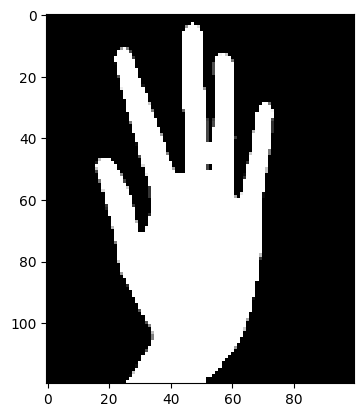

In [152]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/Test Images/img_0.png')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (100, 120))
gray_image = gray_image.reshape(1, 100, 120, 1)

pred = model.predict(gray_image)
y = np.argmax(pred)
print("Predict class:",y)